# Google News numbers

In [83]:
import pandas as pd
import json
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
df = pd.read_csv("events/events_dataframe_de.csv", converters={'redirects': pd.eval, 'list_views_7_days':pd.eval})
df = df[(df["views_7_sum"] != 0) & (df.cat != "")]
len(df["pagetitle"].unique())

1014

In [85]:
with open('scraping/results/de_google.json') as json_data:
    data = json.load(json_data)
len(data.keys())

1014

In [93]:
with open('scraping/results/de_google_old.json') as json_data:
    data_old = json.load(json_data)
len(data_old.keys())

1014

In [86]:
with open('scraping/results/de_bingnews_new.json') as json_data:
    bing_data = json.load(json_data)
len(bing_data.keys())

1014

In [87]:
def get_hits_from_json(json_data, serp='google_news'):
    news_hits = []
    i = 0 
    for title, crawl_res in json_data.items():
        # get result string and clean
        res_string = crawl_res['1']['num_results']
        num_string = re.sub('[^0-9]', '', res_string)
        
        num = 0
        if num_string != '':
            num = int(num_string)
            
        news_hits.append([title, num])
        
        # debug output
        if i%100 == 0:
            print(title, res_string, num_string)
        i+=1
    return pd.DataFrame(news_hits, columns=['pagetitle', f'{serp}_hits'])

In [88]:
news_hits_bing = get_hits_from_json(bing_data, serp='bing_news')
news_hits_bing.head()

Griechisches Referendum 2015 48 Ergebnisse 48
Parlamentswahl im Iran 2016 72 Ergebnisse 72
Parlamentswahl in Kroatien 2016 27 Ergebnisse 27
Oscarverleihung 2017 19.300 Ergebnisse 19300
Anschlagsversuch am 20. Juni 2017 in Brüssel 22.200 Ergebnisse 22200
Super Bowl LII 5.990 Ergebnisse 5990
6-Stunden-Rennen von Silverstone 2018 10.800 Ergebnisse 10800
Biathlon-Weltmeisterschaften 2019 8.860 Ergebnisse 8860
Anschlag in El Paso 32 Ergebnisse 32
Pabandom iš naujo! 2020 33 Ergebnisse 33
Deutsche Meisterschaften im Rennrodeln 2020 40.500 Ergebnisse 40500


,pagetitle,bing_news_hits
0,Griechisches Referendum 2015,48
1,Großer Preis von Großbritannien 2015,27300
2,Amoklauf von Leutershausen,5
3,Anschlag in Suruç 2015,11300
4,Amoklauf in Lafayette,42


In [94]:
news_hits = get_hits_from_json(data, serp='google_news')
news_hits.head()

Griechisches Referendum 2015 Ungefähr 4.980 Ergebnisse (0,33 Sekunden)  4980033
Parlamentswahl im Iran 2016 0 NOT FOUND 0
Parlamentswahl in Kroatien 2016 0 NOT FOUND 0
Oscarverleihung 2017 0 NOT FOUND 0
Anschlagsversuch am 20. Juni 2017 in Brüssel 0 NOT FOUND 0
Super Bowl LII 0 NOT FOUND 0
6-Stunden-Rennen von Silverstone 2018 0 NOT FOUND 0
Biathlon-Weltmeisterschaften 2019 0 NOT FOUND 0
Anschlag in El Paso 0 NOT FOUND 0
Pabandom iš naujo! 2020 0 NOT FOUND 0
Deutsche Meisterschaften im Rennrodeln 2020 0 NOT FOUND 0


,pagetitle,google_news_hits
0,Griechisches Referendum 2015,4980033
1,Großer Preis von Großbritannien 2015,32600035
2,Amoklauf von Leutershausen,1630025
3,Anschlag in Suruç 2015,1310032
4,Amoklauf in Lafayette,1210034


In [104]:
news_hits_old = get_hits_from_json(data_old, serp='google_news_old')
news_hits_old.head()

Griechisches Referendum 2015  
Parlamentswahl im Iran 2016  
Parlamentswahl in Kroatien 2016  
Oscarverleihung 2017  
Anschlagsversuch am 20. Juni 2017 in Brüssel  
Super Bowl LII  
6-Stunden-Rennen von Silverstone 2018  
Biathlon-Weltmeisterschaften 2019  
Anschlag in El Paso  
Pabandom iš naujo! 2020  
Deutsche Meisterschaften im Rennrodeln 2020  


,pagetitle,google_news_old_hits
0,Griechisches Referendum 2015,0
1,Großer Preis von Großbritannien 2015,39900034
2,Amoklauf von Leutershausen,1170022
3,Anschlag in Suruç 2015,1450024
4,Amoklauf in Lafayette,1510023


In [96]:
df_news_comb = news_hits_bing.merge(news_hits, on='pagetitle', copy=False)
df_news_comb['log_bing'] = np.log1p(df_news_comb.bing_news_hits)
df_news_comb['log_google'] = np.log1p(df_news_comb.google_news_hits)
df_news_comb.head()

,pagetitle,bing_news_hits,google_news_hits,log_bing,log_google
0,Griechisches Referendum 2015,48,4980033,3.891820,15.420947
1,Großer Preis von Großbritannien 2015,27300,32600035,10.214679,17.299824
2,Amoklauf von Leutershausen,5,1630025,1.791759,14.304107
3,Anschlag in Suruç 2015,11300,1310032,9.332646,14.085563
4,Amoklauf in Lafayette,42,1210034,3.761200,14.006160


In [100]:
df_news_comb[df_news_comb.google_news_hits > 0][['bing_news_hits', 'google_news_hits']].corr('pearson')

,bing_news_hits,google_news_hits
bing_news_hits,1.000000,0.913729
google_news_hits,0.913729,1.000000


In [102]:
df_news_comb[df_news_comb.google_news_hits > 0][['log_bing', 'log_google']].corr('pearson')

,log_bing,log_google
log_bing,1.000000,0.452527
log_google,0.452527,1.000000


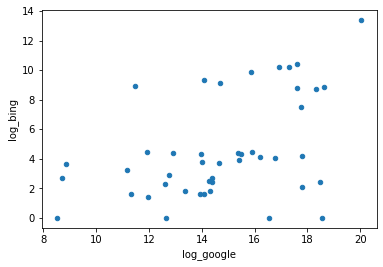

In [103]:
df_news_comb[df_news_comb.google_news_hits > 0][['log_bing', 'log_google']].plot.scatter(x='log_google', y='log_bing')

In [107]:
df_news_comb_old = news_hits_bing.merge(news_hits_old, on='pagetitle', copy=False)
df_news_comb_old['log_bing'] = np.log1p(df_news_comb_old.bing_news_hits)
df_news_comb_old['log_google'] = np.log1p(df_news_comb_old.google_news_old_hits)
df_news_comb_old.head()

,pagetitle,bing_news_hits,google_news_old_hits,log_bing,log_google
0,Griechisches Referendum 2015,48,0,3.891820,0.000000
1,Großer Preis von Großbritannien 2015,27300,39900034,10.214679,17.501888
2,Amoklauf von Leutershausen,5,1170022,1.791759,13.972534
3,Anschlag in Suruç 2015,11300,1450024,9.332646,14.187091
4,Amoklauf in Lafayette,42,1510023,3.761200,14.227636


In [111]:
len(df_news_comb_old[df_news_comb_old.google_news_old_hits > 0])

82

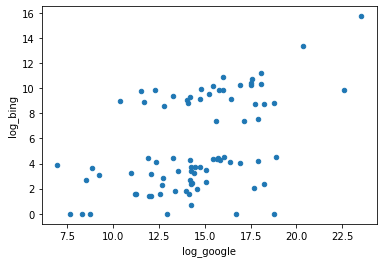

In [110]:
df_news_comb_old[df_news_comb_old.google_news_old_hits > 0][['log_bing', 'log_google']].plot.scatter(x='log_google', y='log_bing')

In [82]:
model = smf.ols(formula='log_google ~ log_bing', data=df_news_comb).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_google   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.738
Date:                Wed, 22 Dec 2021   Prob (F-statistic):              0.188
Time:                        14:26:43   Log-Likelihood:                -2861.8
No. Observations:                1014   AIC:                             5728.
Df Residuals:                    1012   BIC:                             5737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4579      0.247      5.891      0.000       0.972       1.944
log_bing      -0.0436      0.033     -1.318      0.188      -0.108       0.021
==============================================================================
Omnibus:                      703.852   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5924.657
Skew:                           3.335   Prob(JB):                         0.00
Kurtosis:                      12.784   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(df_news_comb['bing_news_hits'].values, df_news_comb['google_news_hits'].values))
print(spearmanr(df_news_comb['bing_news_hits'].values, df_news_comb['google_news_hits'].values))

(0.441282257057634, 1.4426911281101893e-49)
SpearmanrResult(correlation=-0.07160502944963061, pvalue=0.022592255511827506)


In [33]:
news_hits = get_hits_from_json(data)
news_hits.head()

Griechisches Referendum 2015  
Parlamentswahl im Iran 2016  
Parlamentswahl in Kroatien 2016  
Oscarverleihung 2017  
Anschlagsversuch am 20. Juni 2017 in Brüssel  
Super Bowl LII  
6-Stunden-Rennen von Silverstone 2018  
Biathlon-Weltmeisterschaften 2019  
Anschlag in El Paso  
Pabandom iš naujo! 2020  
Deutsche Meisterschaften im Rennrodeln 2020  


,pagetitle,google_news_hits
0,Griechisches Referendum 2015,0
1,Großer Preis von Großbritannien 2015,39900034
2,Amoklauf von Leutershausen,1170022
3,Anschlag in Suruç 2015,1450024
4,Amoklauf in Lafayette,1510023


In [27]:
news_hits[news_hits.google_news_hits == 0]

,pagetitle,google_news_hits
0,Griechisches Referendum 2015,0
8,Trigana-Air-Service-Flug 267,0
16,Trans Vorarlberg Triathlon,0
85,Daallo-Airlines-Flug 159,0
86,Goldene Kamera 2016,0
...,...,...
1009,Handball-Europameisterschaft der Frauen 2020,0
1010,Bombenanschlag in Nashville 2020,0
1011,Parlamentswahl in Niger 2020,0
1012,World Team Challenge 2020,0


In [8]:
df[df.pagetitle.duplicated(keep=False)]

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,views_before_min,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean
45,Trans Vorarlberg Triathlon,2015-09-05,Global North,Europe,sports,"['Kategorie:Erstveranstaltung 1993', 'Kategori...",223,10.428571,73,28,4,8.0,20,"[104, 56, 31, 14, 7, 8, 3]",-1368,2015,planed,not_surprising,before,31.857143
481,Trans Vorarlberg Triathlon,2016-08-27,Global North,Europe,sports,"['Kategorie:Erstveranstaltung 1993', 'Kategori...",274,17.285714,121,28,7,19.0,21,"[125, 75, 28, 12, 6, 15, 13]",-1725,2016,planed,not_surprising,before,39.142857
809,Trans Vorarlberg Triathlon,2017-08-26,Global North,Europe,sports,"['Kategorie:Erstveranstaltung 1993', 'Kategori...",217,15.428571,108,32,6,14.0,26,"[107, 50, 17, 8, 6, 10, 19]",-2089,2017,planed,not_surprising,before,31.000000
1098,Trans Vorarlberg Triathlon,2018-08-26,Global North,Europe,sports,"['Kategorie:Erstveranstaltung 1993', 'Kategori...",196,19.000000,133,40,6,11.0,34,"[103, 42, 8, 17, 15, 4, 7]",-2454,2018,planed,not_surprising,before,28.000000


In [11]:
# remove recurring events
df = df[~df.pagetitle.duplicated(keep=False)]
df = df.merge(news_hits, on='pagetitle', copy=False, how='left')

In [12]:
not_found = df[pd.isna(df.google_news_hits)].copy()
not_found

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,...,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean,google_news_hits


In [13]:
df = df[~pd.isna(df.google_news_hits)]
df

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,...,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean,google_news_hits
0,Griechisches Referendum 2015,2015-07-05,Global North,Europe,politics,"['Kategorie:Eurokrise', 'Kategorie:Griechische...",37404,3421.000000,13684,4032,...,3590.5,-999,"[10231, 16293, 4343, 2445, 1738, 1310, 912]",-9,2015,planed,not_surprising,before,5324.571429,0
1,Großer Preis von Großbritannien 2015,2015-07-05,Global North,Europe,sports,"['Kategorie:Großer Preis von Großbritannien', ...",1155,126.500000,253,158,...,126.5,63,"[474, 365, 116, 68, 49, 42, 41]",-123,2015,planed,not_surprising,before,165.000000,39900034
2,Amoklauf von Leutershausen,2015-07-10,Global North,Europe,disaster,"['Kategorie:Amoklauf in Deutschland', 'Kategor...",12222,0.000000,0,0,...,0.0,0,"[726, 3769, 7014, 285, 150, 98, 72]",0,2015,not_planed,not_surprising,NaN,1730.571429,1170022
3,Anschlag in Suruç 2015,2015-07-20,Global North,Asia,disaster,['Kategorie:Islamistischer Anschlag in der Tür...,17734,0.000000,0,0,...,0.0,0,"[442, 2826, 6157, 3239, 2438, 2000, 592]",0,2015,not_planed,not_surprising,NaN,2527.714286,1450024
4,Amoklauf in Lafayette,2015-07-23,Global North,North America,disaster,['Kategorie:Amoklauf in den Vereinigten Staate...,507,0.000000,0,0,...,0.0,0,[],1,2015,not_planed,surprising,surprising,0.000000,1510023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,Handball-Europameisterschaft der Frauen 2020,2020-12-20,Global North,Europe,sports,['Kategorie:Handball-Europameisterschaft der F...,19163,320.000000,2240,548,...,321.0,387,"[2015, 4036, 1924, 2032, 3308, 3611, 2237]",-885,2020,planed,not_surprising,before,2737.571429,0
1009,Bombenanschlag in Nashville 2020,2020-12-25,Global North,North America,disaster,"['Kategorie:Geschichte (Nashville)', 'Kategori...",505,0.000000,0,0,...,0.0,0,"[316, 189]",5,2020,not_planed,not_surprising,after,252.500000,0
1010,Parlamentswahl in Niger 2020,2020-12-27,Global South,Africa,politics,"['Kategorie:Parlamentswahl 2020', 'Kategorie:W...",290,0.000000,0,0,...,0.0,0,"[20, 32, 10, 27, 13, 19, 19]",0,2020,not_planed,not_surprising,NaN,20.000000,0
1011,World Team Challenge 2020,2020-12-28,Global North,Europe,sports,"['Kategorie:Biathlonveranstaltung 2020', 'Kate...",727,59.666667,179,70,...,55.0,15,"[381, 229, 42, 23, 15, 23, 14]",-3,2020,planed,not_surprising,before,103.857143,0


In [16]:
df[['views_7_sum', 'year', 'google_news_hits']].corr('pearson')

,views_7_sum,year,google_news_hits
views_7_sum,1.000000,-0.004236,-0.014063
year,-0.004236,1.000000,-0.078352
google_news_hits,-0.014063,-0.078352,1.000000


In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
# does this correlate with general google trends?

In [14]:
df[df.views_7_days_mean > 0]

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,...,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean,google_news_hits
0,Griechisches Referendum 2015,2015-07-05,Global North,Europe,politics,"['Kategorie:Eurokrise', 'Kategorie:Griechische...",37404,3421.000000,13684,4032,...,3590.5,-999,"[10231, 16293, 4343, 2445, 1738, 1310, 912]",-9,2015,planed,not_surprising,before,5324.571429,0
1,Großer Preis von Großbritannien 2015,2015-07-05,Global North,Europe,sports,"['Kategorie:Großer Preis von Großbritannien', ...",1155,126.500000,253,158,...,126.5,63,"[474, 365, 116, 68, 49, 42, 41]",-123,2015,planed,not_surprising,before,165.000000,39900034
2,Amoklauf von Leutershausen,2015-07-10,Global North,Europe,disaster,"['Kategorie:Amoklauf in Deutschland', 'Kategor...",12222,0.000000,0,0,...,0.0,0,"[726, 3769, 7014, 285, 150, 98, 72]",0,2015,not_planed,not_surprising,NaN,1730.571429,1170022
3,Anschlag in Suruç 2015,2015-07-20,Global North,Asia,disaster,['Kategorie:Islamistischer Anschlag in der Tür...,17734,0.000000,0,0,...,0.0,0,"[442, 2826, 6157, 3239, 2438, 2000, 592]",0,2015,not_planed,not_surprising,NaN,2527.714286,1450024
5,Großer Preis von Ungarn 2015,2015-07-26,Global North,Europe,sports,"['Kategorie:Großer Preis von Ungarn', 'Kategor...",2040,142.000000,284,207,...,142.0,130,"[973, 594, 162, 126, 86, 53, 46]",-144,2015,planed,not_surprising,before,291.428571,6920026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,Handball-Europameisterschaft der Frauen 2020,2020-12-20,Global North,Europe,sports,['Kategorie:Handball-Europameisterschaft der F...,19163,320.000000,2240,548,...,321.0,387,"[2015, 4036, 1924, 2032, 3308, 3611, 2237]",-885,2020,planed,not_surprising,before,2737.571429,0
1009,Bombenanschlag in Nashville 2020,2020-12-25,Global North,North America,disaster,"['Kategorie:Geschichte (Nashville)', 'Kategori...",505,0.000000,0,0,...,0.0,0,"[316, 189]",5,2020,not_planed,not_surprising,after,252.500000,0
1010,Parlamentswahl in Niger 2020,2020-12-27,Global South,Africa,politics,"['Kategorie:Parlamentswahl 2020', 'Kategorie:W...",290,0.000000,0,0,...,0.0,0,"[20, 32, 10, 27, 13, 19, 19]",0,2020,not_planed,not_surprising,NaN,20.000000,0
1011,World Team Challenge 2020,2020-12-28,Global North,Europe,sports,"['Kategorie:Biathlonveranstaltung 2020', 'Kate...",727,59.666667,179,70,...,55.0,15,"[381, 229, 42, 23, 15, 23, 14]",-3,2020,planed,not_surprising,before,103.857143,0


In [17]:
import numpy as np
model = smf.ols(formula='np.log1p(google_news_hits) ~ year*np.log1p(views_7_days_mean)', data=df.dropna()).fit()    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log1p(google_news_hits)   R-squared:                       0.275
Model:                                    OLS   Adj. R-squared:                  0.273
Method:                         Least Squares   F-statistic:                     104.2
Date:                        Wed, 22 Dec 2021   Prob (F-statistic):           3.50e-57
Time:                                13:34:37   Log-Likelihood:                -2216.0
No. Observations:                         827   AIC:                             4440.
Df Residuals:                             823   BIC:                             4459.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         4506.2150    410.003     10.991      0.000    3701.440    5310.990
year                                -2.2325      0.203    -10.985      0.000      -2.631      -1.834
np.log1p(views_7_days_mean)       -316.3585     66.817     -4.735      0.000    -447.510    -185.207
year:np.log1p(views_7_days_mean)     0.1567      0.033      4.733      0.000       0.092       0.222
==============================================================================
Omnibus:                      377.866   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1747.139
Skew:                           2.128   Prob(JB):                         0.00
Kurtosis:                       8.709   Cond. No.                     4.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
d = {'views_before_sum': df['views_before_sum'].apply(lambda x:np.log(x+1)),
     'views_before_mean': df['views_before_mean'].apply(lambda x:np.log(x+1)),
     'views_before_median': df['views_before_median'].apply(lambda x:np.log(x+1)),
     'views_before_max': df['views_before_max'].apply(lambda x:np.log(x+1)),
     'views_before_min': df['views_before_min'].apply(lambda x:np.log(x+1)),
     'views_before_increase': df['views_before_increase'].apply(lambda x:np.log(x+abs(min(df.views_before_increase))+1)),
     'views_7_sum': df['views_7_sum'].apply(lambda x:np.log(x+1)),
     'diff_days':df['diff_days'].apply(lambda x:np.log(x+abs(min(df.diff_days))+1)),
     'economic_region':df['economic_region'],
     'cat': df['cat'],
     'planed':df['planed'],
     'surprising': df['surprising'],
     'factor':df['factor'],
     'year':df['year'],
     'google_news': np.log1p(df['google_news_hits'])
    }
data = pd.DataFrame(data=d)

In [23]:
df[df.google_news_hits == 0]

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,...,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean,google_news_hits
0,Griechisches Referendum 2015,2015-07-05,Global North,Europe,politics,"['Kategorie:Eurokrise', 'Kategorie:Griechische...",37404,3421.000000,13684,4032,...,3590.5,-999,"[10231, 16293, 4343, 2445, 1738, 1310, 912]",-9,2015,planed,not_surprising,before,5324.571429,0
8,Trigana-Air-Service-Flug 267,2015-08-16,Global South,Asia,disaster,"['Kategorie:ATR 42', 'Kategorie:Flugunfall 201...",21964,0.000000,0,0,...,0.0,0,"[1331, 8712, 6348, 3840, 1446, 166, 91]",0,2015,not_planed,not_surprising,NaN,3133.428571,0
84,Daallo-Airlines-Flug 159,2016-02-02,Global South,Africa,disaster,"['Kategorie:Airbus-A320-Familie', 'Kategorie:F...",3908,0.000000,0,0,...,0.0,0,"[401, 950, 437, 728, 366, 427, 411]",0,2016,not_planed,not_surprising,NaN,531.428571,0
85,Goldene Kamera 2016,2016-02-06,Global North,Europe,culture,"['Kategorie:Filmjahr 2016', 'Kategorie:Goldene...",17111,115.428571,808,221,...,92.0,160,"[3451, 6499, 5977, 478, 322, 209, 175]",-92,2016,planed,not_surprising,before,2444.428571,0
86,Buenos Aires ePrix 2016,2016-02-06,Global South,South America,sports,"['Kategorie:Buenos Aires E-Prix', 'Kategorie:R...",230,19.000000,19,19,...,19.0,0,"[64, 74, 54, 9, 14, 6, 9]",-149,2016,planed,not_surprising,before,32.857143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,Handball-Europameisterschaft der Frauen 2020,2020-12-20,Global North,Europe,sports,['Kategorie:Handball-Europameisterschaft der F...,19163,320.000000,2240,548,...,321.0,387,"[2015, 4036, 1924, 2032, 3308, 3611, 2237]",-885,2020,planed,not_surprising,before,2737.571429,0
1009,Bombenanschlag in Nashville 2020,2020-12-25,Global North,North America,disaster,"['Kategorie:Geschichte (Nashville)', 'Kategori...",505,0.000000,0,0,...,0.0,0,"[316, 189]",5,2020,not_planed,not_surprising,after,252.500000,0
1010,Parlamentswahl in Niger 2020,2020-12-27,Global South,Africa,politics,"['Kategorie:Parlamentswahl 2020', 'Kategorie:W...",290,0.000000,0,0,...,0.0,0,"[20, 32, 10, 27, 13, 19, 19]",0,2020,not_planed,not_surprising,NaN,20.000000,0
1011,World Team Challenge 2020,2020-12-28,Global North,Europe,sports,"['Kategorie:Biathlonveranstaltung 2020', 'Kate...",727,59.666667,179,70,...,55.0,15,"[381, 229, 42, 23, 15, 23, 14]",-3,2020,planed,not_surprising,before,103.857143,0


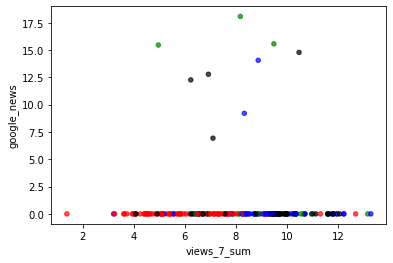

In [26]:
col = data[data.year==2016].cat.map({'politics':'b', 'sports':'r', 'disaster': 'black', 'culture': 'g'})
data[data.year==2016].plot.scatter(x='views_7_sum', y='google_news', c=col, alpha=0.7)

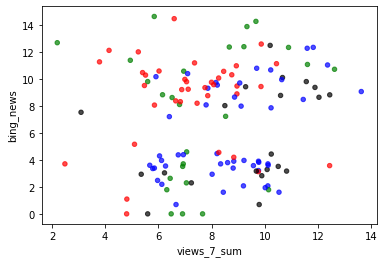

In [34]:
col = data[data.year==2020].cat.map({'politics':'b', 'sports':'r', 'disaster': 'black', 'culture': 'g'})
data[data.year==2020].plot.scatter(x='views_7_sum', y='bing_news', c=col, alpha=0.7)

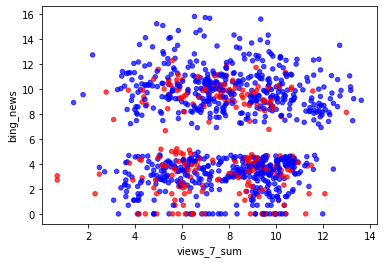

In [20]:
col = data.economic_region.map({'Global South':'r', 'Global North':'b'})
data.plot.scatter(x='views_7_sum', y='bing_news', c=col, alpha=0.7)